In [2]:
import jieba
import codecs
import sys
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import imageio
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [3]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [4]:
before = pd.read_csv("love_before.csv")
after = pd.read_csv("love_after.csv")

In [15]:
before_top = before[0:10]
after_top = after[0:10]

In [16]:
before_top

,word,number
0,babe,11
1,吃饭,4
2,回家,4
3,辛苦,4
4,一会,3
5,晚上,3
6,明天,3
7,不想,3
8,回来,3
9,狗子,3


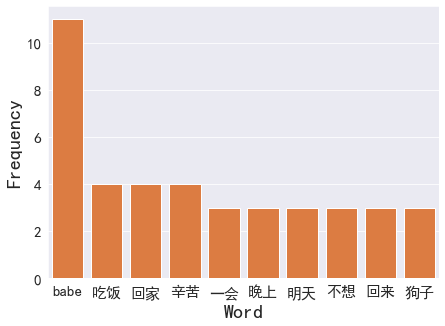

In [28]:
plt.figure(figsize=(7,5))
sns.barplot(x="word",y="number",data=before_top,color="#F57629")
plt.xlabel("Word",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Most frequent words - before",fontsize=20)
plt.savefig("freq_before.png")
plt.show()

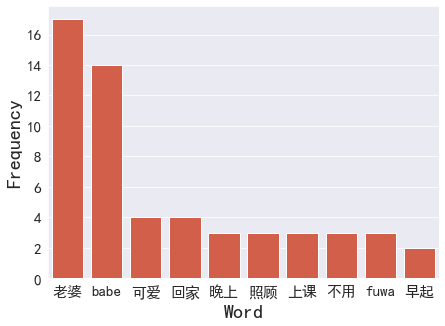

In [29]:
plt.figure(figsize=(7,5))
sns.barplot(x="word",y="number",data=after_top,color="#E94F33")
plt.xlabel("Word",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Most frequent words - after",fontsize=20)
plt.savefig("freq_after.png")
plt.show()

# Sentiment Analysis

In [20]:
from snownlp import SnowNLP

In [30]:
before_df = pd.read_csv("before.txt",sep="\n",header=None)
before_df.columns = ["text"]
before_df["score"] = [SnowNLP(s).sentiments for s in before_df["text"]]
before_df["time"]="Pre-marriage"

In [31]:
after_df = pd.read_csv("after.txt",sep="\n",header=None)
after_df.columns = ["text"]
after_df["score"] = [SnowNLP(s).sentiments for s in after_df["text"]]
after_df["time"] = "Post-marriage"

In [32]:
after_df["score"].describe()

count    100.000000
mean       0.618925
std        0.274505
min        0.004094
25%        0.394632
50%        0.646094
75%        0.870975
max        0.996745
Name: score, dtype: float64

In [33]:
before_df["score"].describe()

count    100.000000
mean       0.511562
std        0.247464
min        0.000023
25%        0.338005
50%        0.482549
75%        0.696452
max        0.995010
Name: score, dtype: float64

In [35]:
merged = pd.concat([after_df,before_df]).reset_index()
merged['time'] = merged['time'].astype('category')
merged["time"] = merged['time'].cat.reorder_categories(['Pre-marriage','Post-marriage'])

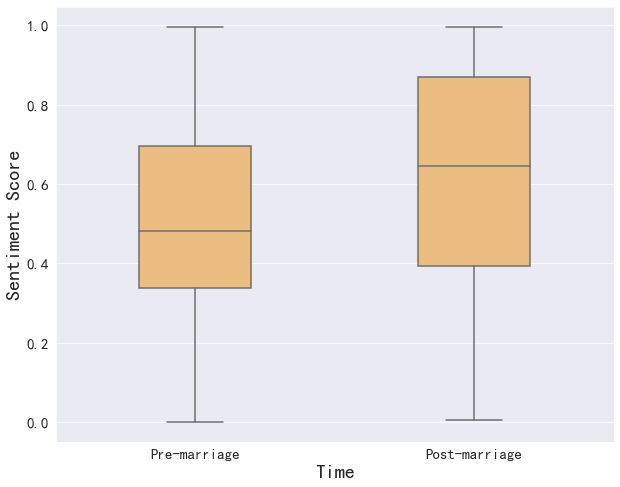

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(data=merged,x="time",y="score",color = sns.color_palette("Paired")[6],width=0.4,autorange=True)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Sentiment Score",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Distribution of sentiment score - Before vs. After",fontsize=20)
plt.savefig("sentiment.png")
plt.show()

In [67]:
## t test 
from scipy.stats import ttest_ind
ttest_ind(before_df["score"],after_df["score"])

Ttest_indResult(statistic=-2.904999743557255, pvalue=0.004090124926139322)